# Note book for Aug 2020 NSF submission

In [31]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [23]:
DATA_IN = '../data/processed/ERA5-MERRA2/'
FN = 'AllDATA-GHS-ERA5-HI406.csv'

In [24]:
data = pd.read_csv(DATA_IN+FN)

In [25]:
data.head()

,Unnamed: 0,ID_HDC_G0,CTR_MN_NM,total_days,duration,avg_temp,avg_intensity,tot_intensity,event_dates,intensity,tmax,year,Event_ID
0,0,5645,Russia,1,1,42.596714,1.996714,1.996714,['1983.06.28'],[1.99671447],[42.59671447],1983,1
1,1,5872,Russia,6,6,43.411134,2.811134,16.866806,['1983.06.23' '1983.06.24' '1983.06.25' '1983....,[5.31903748 2.9527051 0.88265857 2.27567969 4...,[45.91903748 43.5527051 41.48265857 42.875679...,1983,2
2,2,6155,Russia,1,1,42.275731,1.675731,1.675731,['1983.06.26'],[1.67573143],[42.27573143],1983,3
3,3,4993,Russia,1,1,41.127857,0.527857,0.527857,['1983.08.15'],[0.52785663],[41.12785663],1983,4
4,4,3091,Poland,1,1,42.874764,2.274764,2.274764,['1983.05.16'],[2.27476433],[42.87476433],1983,5


# Distributions

In [28]:
A = data[data['CTR_MN_NM'] == 'India']
B = data[data['CTR_MN_NM'] == 'China']
C = data[data['CTR_MN_NM'] == 'Mexico']

In [29]:
def p_X_gt_x(data, stat, X=None):
    
    """Makes probabiliy distribution of sorted, sorted must be sorted first"""
    
    sort = data[stat].sort_values()
    n_sorted = len(sort)
    if X is None:
        X = sort.unique()
    return X, pd.Series([sum(sort>=x)/n_sorted for x in X ])

In [43]:
A_X, A_Y = p_X_gt_x(A, stat = 'duration')
B_X, B_Y = p_X_gt_x(B, stat = 'duration')
C_X, C_Y = p_X_gt_x(C, stat = 'duration')

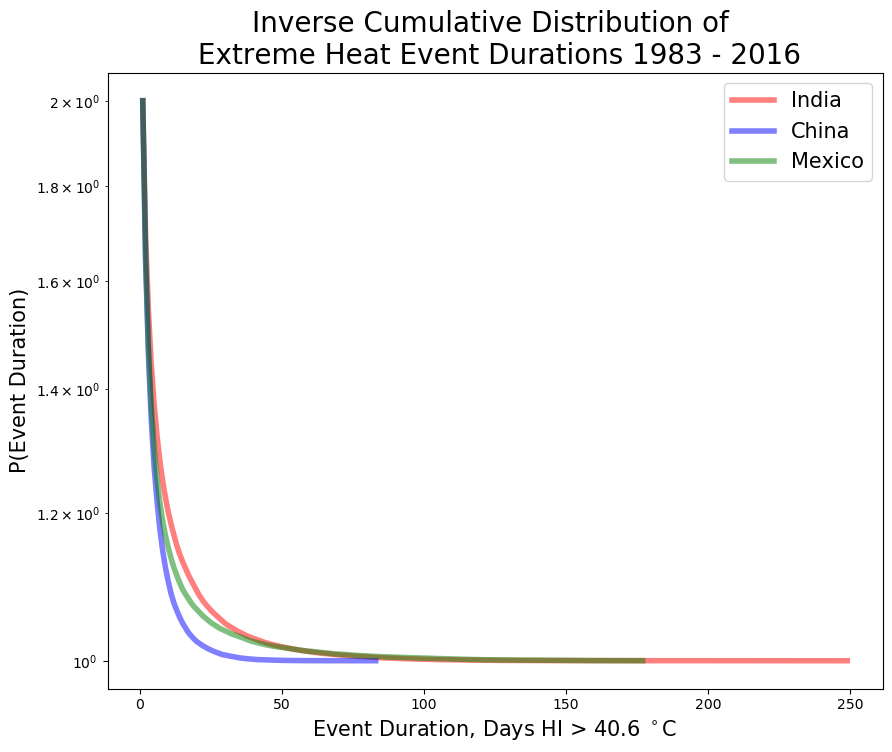

In [55]:
#### Plot 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# style and size
#plt.style.use('fast')
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
plt.yscale('log')

# by decade
plt.plot(A_X, (1+A_Y), color='red', alpha = 0.5, linewidth=4)
plt.plot(B_X, (1+B_Y), color='blue', alpha = 0.5, linewidth=4)
plt.plot(C_X, (1+C_Y), color='green', alpha = 0.5, linewidth=4)

# titles
plt.title('Inverse Cumulative Distribution of \n Extreme Heat Event Durations 1983 - 2016', fontsize = 20)
plt.xlabel('Event Duration, Days HI > 40.6 $^\circ$C', fontsize = 15)
plt.ylabel('P(Event Duration)', fontsize = 15)

# legend
leg_labels = ['India', 'China', 'Mexico']
plt.legend(leg_labels, fontsize = 15)

In [59]:
A[A['duration'] == 249]

,Unnamed: 0,ID_HDC_G0,CTR_MN_NM,total_days,duration,avg_temp,avg_intensity,tot_intensity,event_dates,intensity,tmax,year,Event_ID
3948359,102999,8623,India,270,249,49.545101,8.945101,2227.330213,['2006.02.15' '2006.02.16' '2006.02.17' '2006....,[ 3.00199404 2.58929876 3.3912897 2.891907...,[43.60199404 43.18929876 43.9912897 43.491907...,2006,3948360
3949165,103805,8612,India,263,249,48.846219,8.246219,2053.308421,['2006.02.15' '2006.02.16' '2006.02.17' '2006....,[1.96881208e+00 1.63978440e+00 2.57234910e+00 ...,[42.56881208 42.2397844 43.1723491 42.447169...,2006,3949166


In [76]:
stat86_95  = A[(A['year'] >= 1986) & (A['year'] < 2001)]
#stat96_05  = A[(A['year'] >= 1996) & (A['year'] < 2006)]
stat06_15  = A[(A['year'] >= 2001) & (A['year'] < 2016)]

p1_X, p1_Y = p_X_gt_x(stat86_95, stat = 'duration')
p2_X, p2_Y = p_X_gt_x(stat96_05, stat = 'duration')
p3_X, p3_Y = p_X_gt_x(stat06_15, stat = 'duration')

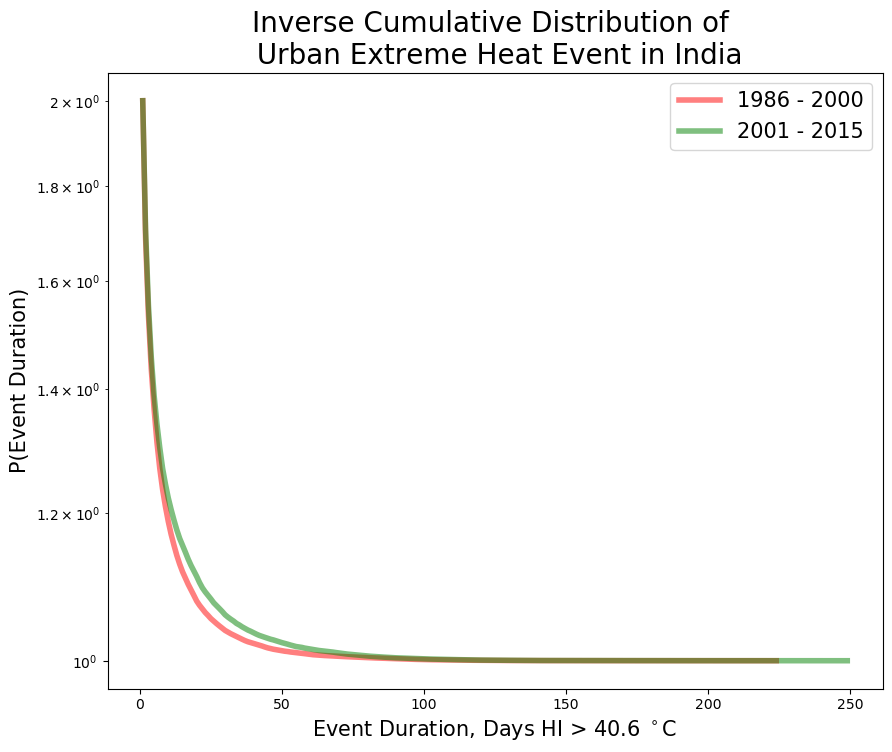

In [79]:
#### Plot 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# style and size
#plt.style.use('fast')
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
plt.yscale('log')

# by decade
plt.plot(p1_X, (1+p1_Y), color='red', alpha = 0.5, linewidth=4)
#plt.plot(p2_X, (1+p2_Y), color='blue', alpha = 0.5, linewidth=4)
plt.plot(p3_X, (1+p3_Y), color='green', alpha = 0.5, linewidth=4)

# titles
plt.title('Inverse Cumulative Distribution of \n Urban Extreme Heat Event in India', fontsize = 20)
plt.xlabel('Event Duration, Days HI > 40.6 $^\circ$C', fontsize = 15)
plt.ylabel('P(Event Duration)', fontsize = 15)

# legend
leg_labels = ['1986 - 2000', '2001 - 2015']
plt.legend(leg_labels, fontsize = 15)